# BRITISH AIRWAY RECOMMENDATION SYSTEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("BA_Data.csv")
data.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


In [3]:
data.drop(["reviews","date","country","route"],axis='columns',inplace=True)
data.head()

,seat_type,recommended,stars,type_of_traveller
0,Business Class,yes,5,Family Leisure
1,Economy Class,no,3,Solo Leisure
2,Business Class,yes,3,Solo Leisure
3,Business Class,yes,5,Couple Leisure
4,Economy Class,no,5,Family Leisure


In [4]:
data.describe()

,stars
count,2500.000000
mean,4.272000
std,2.135378
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,9.000000


### Check if we have any NaN values

In [5]:
data.isnull().sum()

seat_type            0
recommended          0
stars                0
type_of_traveller    0
dtype: int64

In [6]:
data.dtypes

seat_type            object
recommended          object
stars                 int64
type_of_traveller    object
dtype: object

### Data Visualization

Text(0.5, 1.0, 'Recommendation Data Count')

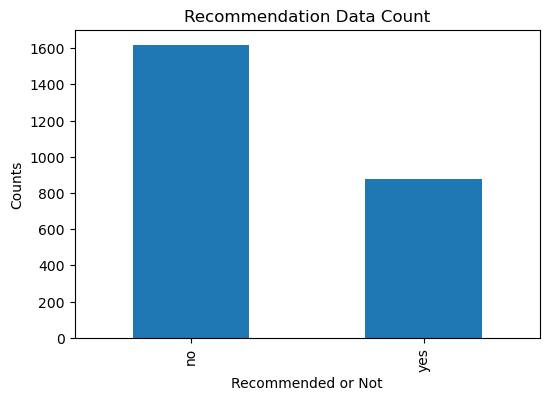

In [7]:
plt.figure(figsize=(6, 4))
data['recommended'].value_counts().plot(kind='bar')
plt.xlabel('Recommended or Not')
plt.ylabel('Counts')
plt.title("Recommendation Data Count")

Text(0.5, 1.0, 'Seat Type Data Count')

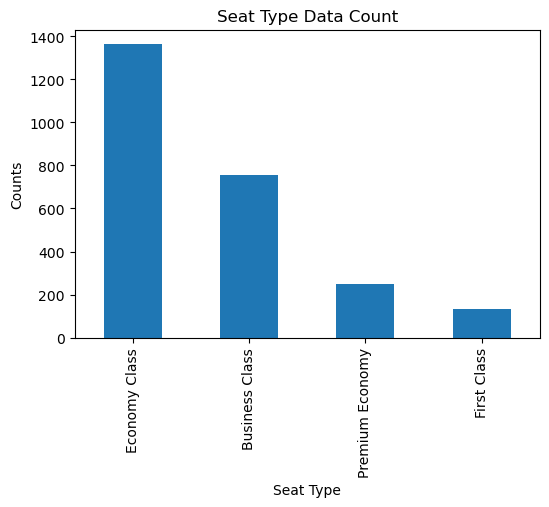

In [8]:
plt.figure(figsize=(6, 4))
data['seat_type'].value_counts().plot(kind='bar')
plt.xlabel('Seat Type')
plt.ylabel('Counts')
plt.title("Seat Type Data Count")

Text(0.5, 1.0, 'Type Of Traveller Count')

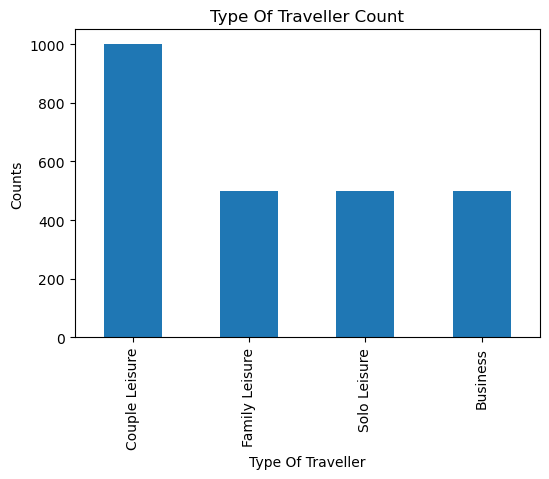

In [9]:
plt.figure(figsize=(6, 4))
data['type_of_traveller'].value_counts().plot(kind='bar')
plt.xlabel('Type Of Traveller')
plt.ylabel('Counts')
plt.title("Type Of Traveller Count")

In [10]:
data['seat_type'].value_counts()

Economy Class      1363
Business Class      754
Premium Economy     248
First Class         135
Name: seat_type, dtype: int64

In [11]:
data['type_of_traveller'].value_counts()

Couple Leisure    1000
Family Leisure     500
Solo Leisure       500
Business           500
Name: type_of_traveller, dtype: int64

In [12]:
data['recommended'].value_counts()

no     1620
yes     880
Name: recommended, dtype: int64

In [13]:
data['recommended'] = data['recommended'].apply(lambda x: 1 if x=='yes' else 0)
data.head(3)

,seat_type,recommended,stars,type_of_traveller
0,Business Class,1,5,Family Leisure
1,Economy Class,0,3,Solo Leisure
2,Business Class,1,3,Solo Leisure


In [14]:
data.dtypes

seat_type            object
recommended           int64
stars                 int64
type_of_traveller    object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create separate LabelEncoder objects for each column
seat_type_encoder = LabelEncoder()
type_of_traveller_encoder = LabelEncoder()

# Encode the 'seat_type' and 'type_of_traveller' columns
data['seat_type2'] = seat_type_encoder.fit_transform(data["seat_type"])
data['type_of_traveller2'] = type_of_traveller_encoder.fit_transform(data["type_of_traveller"])

In [16]:
data.columns

Index(['seat_type', 'recommended', 'stars', 'type_of_traveller', 'seat_type2',
       'type_of_traveller2'],
      dtype='object')

In [17]:
data.head()

,seat_type,recommended,stars,type_of_traveller,seat_type2,type_of_traveller2
0,Business Class,1,5,Family Leisure,0,2
1,Economy Class,0,3,Solo Leisure,1,3
2,Business Class,1,3,Solo Leisure,0,3
3,Business Class,1,5,Couple Leisure,0,1
4,Economy Class,0,5,Family Leisure,1,2


In [18]:
data.drop(["seat_type","type_of_traveller"],axis='columns',inplace=True)
data.head()

,recommended,stars,seat_type2,type_of_traveller2
0,1,5,0,2
1,0,3,1,3
2,1,3,0,3
3,1,5,0,1
4,0,5,1,2


### Test Train Split

In [19]:
X = data.drop(["recommended"],axis='columns')
y = data["recommended"]

In [20]:
X.head()

,stars,seat_type2,type_of_traveller2
0,5,0,2
1,3,1,3
2,3,0,3
3,5,0,1
4,5,1,2


In [21]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: recommended, dtype: int64

### Handling Imbalanced Dataset

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    1620
0    1620
Name: recommended, dtype: int64

In [23]:
X_sm.shape

(3240, 3)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [25]:
# Number of classes in training Data
y_train.value_counts()

0    1296
1    1296
Name: recommended, dtype: int64

In [26]:
X_train.shape

(2592, 3)

### Applying different Machine Learning Algorithms to check which algorithm is giving better accuracy

### Applying Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')

In [29]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [30]:
lr.score(X_test, y_test)

0.5324074074074074

In [32]:
y_pred = lr.predict(X_test)

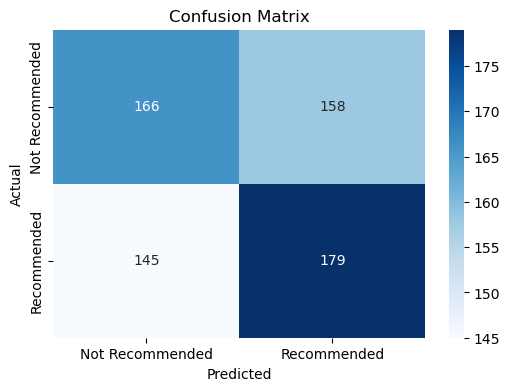

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Accuracy, Precision, Recall, F1_Score, ROC_auc_Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5324074074074074
Precision: 0.5311572700296736
Recall: 0.5524691358024691
F1 Score: 0.5416036308623298
ROC AUC Score: 0.5324074074074074


### Applying Support Vector Machine Model

In [36]:
from sklearn.svm import SVC

In [37]:
svm = SVC(gamma='auto')

In [38]:
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [39]:
svm.score(X_test, y_test)

0.5401234567901234

In [40]:
y_pred = svm.predict(X_test)

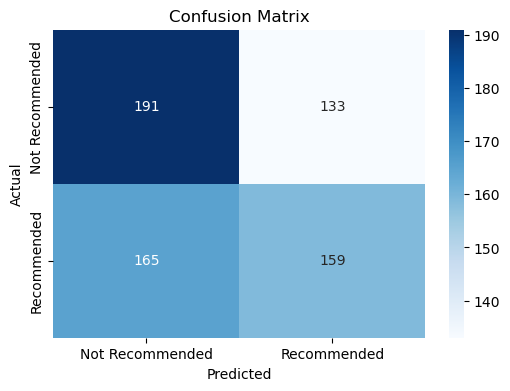

In [41]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
#Accuracy, Precision, Recall, F1_Score, ROC_auc_Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5401234567901234
Precision: 0.5445205479452054
Recall: 0.49074074074074076
F1 Score: 0.5162337662337662
ROC AUC Score: 0.5401234567901234


### Applying Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=40)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [46]:
rf.score(X_test, y_test)

0.5478395061728395

In [47]:
y_pred = rf.predict(X_test)

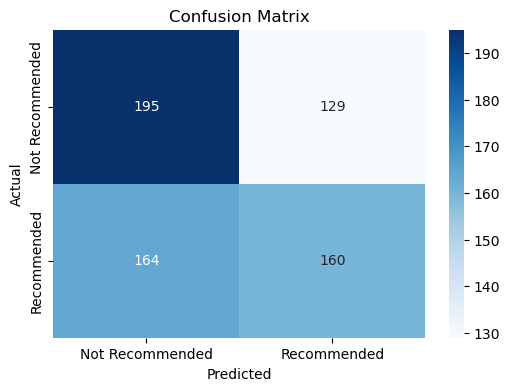

In [48]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
#Accuracy, Precision, Recall, F1_Score, ROC_auc_Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5478395061728395
Precision: 0.5536332179930796
Recall: 0.49382716049382713
F1 Score: 0.5220228384991843
ROC AUC Score: 0.5478395061728395


### Applying Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [51]:
model.fit(X_train, y_train)

GaussianNB()

In [52]:
model.score(X_test,y_test)

0.5308641975308642

In [53]:
y_pred = model.predict(X_test)

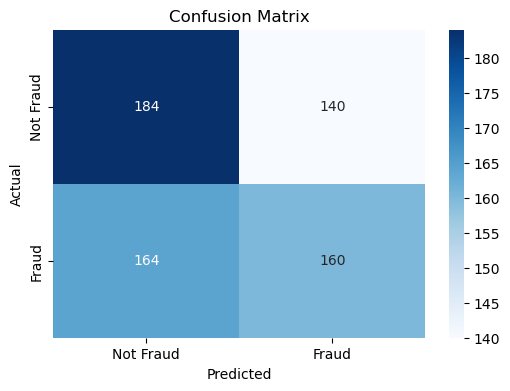

In [54]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#Accuracy, Precision, Recall, F1_Score, ROC_auc_Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5308641975308642
Precision: 0.5333333333333333
Recall: 0.49382716049382713
F1 Score: 0.5128205128205128
ROC AUC Score: 0.5308641975308642
